In [163]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots 
from sklearn.linear_model import (LinearRegression , LogisticRegression , Lasso)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from ISLP import load_data
from ISLP.models import ModelSpec as MS 
from sklearn.model_selection import (train_test_split , GridSearchCV)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
 #Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

In [90]:
# Read in Data
data = pd.read_csv("./Econ424_F2023_PC6_glassdoor_training_small_v1.csv")
print(data.head())

   overall_rating           firm date_review          job_title  \
0               1            IBM  2008-06-21              Sales   
1               4       Deloitte  2008-06-16                      
2               3            IBM  2008-07-21                      
3               4      Microsoft  2008-08-23    Program Manager   
4               5  Capital-Group  2008-09-18   Business Analyst   

        location                                           headline  \
0  Rochester, NY                                               Good   
1    Toronto, ON            Are you going to send this to Deloitte?   
2  Lexington, MA  Big, slow and complex. A place to hide or a pl...   
3   Bellevue, WA                                   Happy - for now.   
4            NaN   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2 

In [91]:
print(data.columns)

Index(['overall_rating', 'firm', 'date_review', 'job_title', 'location',
       'headline', 'pros', 'cons', 'year', 'small'],
      dtype='object')


In [92]:
print(data['small'].unique())


[1]


In [93]:
data.drop(['small'], axis="columns",inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110729 entries, 0 to 110728
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  110729 non-null  int64 
 1   firm            110729 non-null  object
 2   date_review     110729 non-null  object
 3   job_title       110729 non-null  object
 4   location        65101 non-null   object
 5   headline        110607 non-null  object
 6   pros            110729 non-null  object
 7   cons            110729 non-null  object
 8   year            110729 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 7.6+ MB


In [104]:
print(data.head())

   overall_rating          job_title  \
0               1              Sales   
1               4                      
2               3                      
3               4    Program Manager   
4               5   Business Analyst   

                                            headline  \
0                                               Good   
1            Are you going to send this to Deloitte?   
2  Big, slow and complex. A place to hide or a pl...   
3                                   Happy - for now.   
4   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2  A recognizable name and fair to decent benefit...   
3  Working with the latest technology and mature ...   
4  Great benefits and work life balance.  Also, c...   

                                                cons  year  
0                  get l

In [103]:
data.drop(columns=["location","firm","date_review"],inplace=True)

In [105]:
# output to csv file
csv_file_out = "./preprocessing.csv"

# Save the DataFrame to a CSV file
data.to_csv(csv_file_out,index=False, encoding="utf-8", float_format="%1.6f")

In [106]:
df = pd.read_csv("./preprocessing.csv", lineterminator='\n')
print(df.head())

   overall_rating          job_title  \
0               1              Sales   
1               4                      
2               3                      
3               4    Program Manager   
4               5   Business Analyst   

                                            headline  \
0                                               Good   
1            Are you going to send this to Deloitte?   
2  Big, slow and complex. A place to hide or a pl...   
3                                   Happy - for now.   
4   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2  A recognizable name and fair to decent benefit...   
3  Working with the latest technology and mature ...   
4  Great benefits and work life balance.  Also, c...   

                                                cons  year  
0                  get l

In [107]:
# Specify the columns you want to check for missing values
columns_to_check = ['pros', 'cons', 'headline']

# Check for missing values in the specified columns
df = df.dropna(subset=columns_to_check)
missing_values = df[columns_to_check].isna()
rows_with_missing_values = df[missing_values.any(axis=1)]
print(len(rows_with_missing_values))

0


In [108]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [109]:
df['pros'] = df['pros'].astype(str)
df['cons'] = df['cons'].astype(str)


In [110]:
df.count()

overall_rating    110607
job_title         110607
headline          110607
pros              110607
cons              110607
year              110607
dtype: int64

In [111]:
# Feature construction
df['pros_length'] = df['pros'].apply(len)
df['cons_length'] = df['cons'].apply(len)
df['headline_sentiment'] = df['headline'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])
df['pros_sentiment'] = df['pros'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])


In [112]:
df['cons_sentiment'] = df['cons'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])

In [113]:
print(df["headline_sentiment"].isna().values.any())
print(df["pros_sentiment"].isna().values.any())
print(df["cons_sentiment"].isna().values.any())


False
False
False


In [114]:
df.drop(columns=["firm","date_review","small"],inplace=True)

KeyError: "['firm', 'date_review', 'small'] not found in axis"

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110607 entries, 0 to 110728
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   overall_rating      110607 non-null  int64  
 1   job_title           110607 non-null  object 
 2   headline            110607 non-null  object 
 3   pros                110607 non-null  object 
 4   cons                110607 non-null  object 
 5   year                110607 non-null  int64  
 6   pros_length         110607 non-null  int64  
 7   cons_length         110607 non-null  int64  
 8   headline_sentiment  110607 non-null  float64
 9   pros_sentiment      110607 non-null  float64
 10  cons_sentiment      110607 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 10.1+ MB


In [116]:
# output to csv file
csv_file_out = "./postsentiment.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_out,index=False, encoding="utf-8", float_format="%1.6f")

In [119]:
df = pd.read_csv("./postsentiment.csv", lineterminator='\n')
print(df.head())

   overall_rating          job_title  \
0               1              Sales   
1               4                      
2               3                      
3               4    Program Manager   
4               5   Business Analyst   

                                            headline  \
0                                               Good   
1            Are you going to send this to Deloitte?   
2  Big, slow and complex. A place to hide or a pl...   
3                                   Happy - for now.   
4   stable company, fair compensation, great culture   

                                                pros  \
0  close to my home which can save my transportat...   
1  High standard and a lot of good people to work...   
2  A recognizable name and fair to decent benefit...   
3  Working with the latest technology and mature ...   
4  Great benefits and work life balance.  Also, c...   

                                                cons  year  pros_length  \
0         

In [120]:
df.count()

overall_rating        110607
job_title             110607
headline              110607
pros                  110607
cons                  110607
year                  110607
pros_length           110607
cons_length           110607
headline_sentiment    110607
pros_sentiment        110607
cons_sentiment        110607
dtype: int64

In [170]:
# Features and target variable
features = ['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment','year']
target = 'overall_rating'

In [122]:
df.drop(columns=["headline"],inplace=True)

In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [124]:
categorical_columns = ['job_title']
# label encoder to encode the different categorical features
label_encoder = LabelEncoder()
for category in categorical_columns:
    df[category] = label_encoder.fit_transform(df[category])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110607 entries, 0 to 110606
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   overall_rating      110607 non-null  int64  
 1   job_title           110607 non-null  int64  
 2   pros                110607 non-null  object 
 3   cons                110607 non-null  object 
 4   year                110607 non-null  int64  
 5   pros_length         110607 non-null  int64  
 6   cons_length         110607 non-null  int64  
 7   headline_sentiment  110607 non-null  float64
 8   pros_sentiment      110607 non-null  float64
 9   cons_sentiment      110607 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 8.4+ MB


In [140]:
y = df['overall_rating']
X = df.drop(columns=['overall_rating','pros','cons','job_title'])

In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110607 entries, 0 to 110606
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                110607 non-null  int64  
 1   pros_length         110607 non-null  int64  
 2   cons_length         110607 non-null  int64  
 3   headline_sentiment  110607 non-null  float64
 4   pros_sentiment      110607 non-null  float64
 5   cons_sentiment      110607 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 5.1 MB


In [132]:
X.job_title.unique()

array([10145,     0,  9065, ...,  6120,  8084,  4835])

In [130]:
# Apply standard scaler
scaler = StandardScaler(with_mean=True, with_std=True,copy=True)
scaler.fit(X)
X_std = scaler.transform(X)
feature_std = pd.DataFrame( X_std ,columns=X.columns)
print("feature std:")
print(feature_std.std())
print(feature_std)
# regular
featureVals = X.values
print("printing regular features")
print(X)
print(featureVals)

feature std:
job_title             1.000005
year                  1.000005
pros_length           1.000005
cons_length           1.000005
headline_sentiment    1.000005
pros_sentiment        1.000005
cons_sentiment        1.000005
dtype: float64
        job_title      year  pros_length  cons_length  headline_sentiment  \
0        1.290618 -3.264055    -0.393630    -0.451640            0.717057   
1       -0.931965 -3.264055    -0.424488    -0.383510           -0.578667   
2       -0.931965 -3.264055     1.920757     0.726606            0.603784   
3        1.054010 -3.264055     1.087578     1.003133            1.103950   
4       -0.569604 -3.264055     1.457880     0.041300            1.841254   
...           ...       ...          ...          ...                 ...   
110602  -0.804459  1.153882    -0.555637    -0.467670           -0.578667   
110603  -0.804459  1.153882    -0.470776    -0.479693            0.717057   
110604   1.524159  1.153882    -0.625069     0.510194         

In [142]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [143]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
# Train the NLP model
modelBasic = MLPRegressor(random_state=42)
modelBasic.fit(X_train, y_train)

MLPRegressor(random_state=42)

In [145]:
# Make predictions
train_predictions = np.clip(modelBasic.predict(X_train), 1, 5)
test_predictions = np.clip(modelBasic.predict(X_test), 1, 5)

In [146]:
print(len(train_predictions))
print(len(X_train))

print(len(test_predictions))
print(len(X_test))


88485
88485
22122
22122


In [147]:
# Assess the model's performance
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [148]:
# Display results
print(f"Training MSE: {train_mse}, Training R^2: {train_r2}")
print(f"Test MSE: {test_mse}, Test R^2: {test_r2}")

Training MSE: 1.121366996538431, Training R^2: 0.19801457835494696
Test MSE: 1.1496464774461155, Test R^2: 0.18305007633234172


In [188]:
# Model Building with Sigmoid Neuron
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', max_iter=500, solver='adam')
model.fit(X_train, y_train)

# Make predictions
# y_train_pred = np.clip(model.predict(X_train),1, 5)
# y_test_pred = np.clip(model.predict(X_test),1,5)
y_train_pred = np.round(np.clip(model.predict(X_train),1, 5))
y_test_pred = np.round(np.clip(model.predict(X_test),1,5))

# Model Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print MSE and R2 for the training set
print(f'MSE (Training Set): {mse_train}')
print(f'R2 Score (Training Set): {r2_train}')


# Print MSE and R2 for the training set
print(f'MSE (Test Set): {mse_test}')
print(f'R2 Score (Test Set): {r2_test}')

y_train_pred.dtype

MSE (Training Set): 0.9319997739729897
R2 Score (Training Set): 0.3334472710449473
MSE (Test Set): 0.9354940782931019
R2 Score (Test Set): 0.33522884569624856


dtype('float64')

In [189]:
sizes = [(100),(100,50),(100,50,25),(100,25)]
mses = []
r2s = []
bestr2 = r2_test
bestmse = mse_test
bestmodel = model
for size in sizes:
    currmodel = MLPRegressor(hidden_layer_sizes=size, activation='logistic', max_iter=500, solver='adam')
    currmodel.fit(X_train, y_train)

    # Make predictions
    # y_train_pred = np.clip(model.predict(X_train),1, 5)
    # y_test_pred = np.clip(model.predict(X_test),1,5)
    curry_train_pred = np.round(np.clip(currmodel.predict(X_train),1, 5))
    curry_test_pred = np.round(np.clip(currmodel.predict(X_test),1,5))
    currmse_test = mean_squared_error(y_test, curry_test_pred)
    currr2_test = r2_score(y_test, curry_test_pred)
    if currr2_test > bestr2:
        bestmodel = currmodel
        bestr2 = currr2_test
        bestmse = currmse_test
    mses.append(currmse_test)
    r2s.append(currr2_test)
print(bestr2)
print(bestmse)

0.34011143644059116


In [186]:
mses

[0.9257752463610885, 0.941144561974505, 0.9290299249615767, 0.9311545068257843]

In [187]:
r2s

[0.34213514181489113,
 0.3312135572551773,
 0.33982233567283404,
 0.33831258721899127]

In [190]:
model = bestmodel

In [194]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=42)

# Get feature names
feature_names = X_train.columns


In [197]:
# Get mean importance scores and sort
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

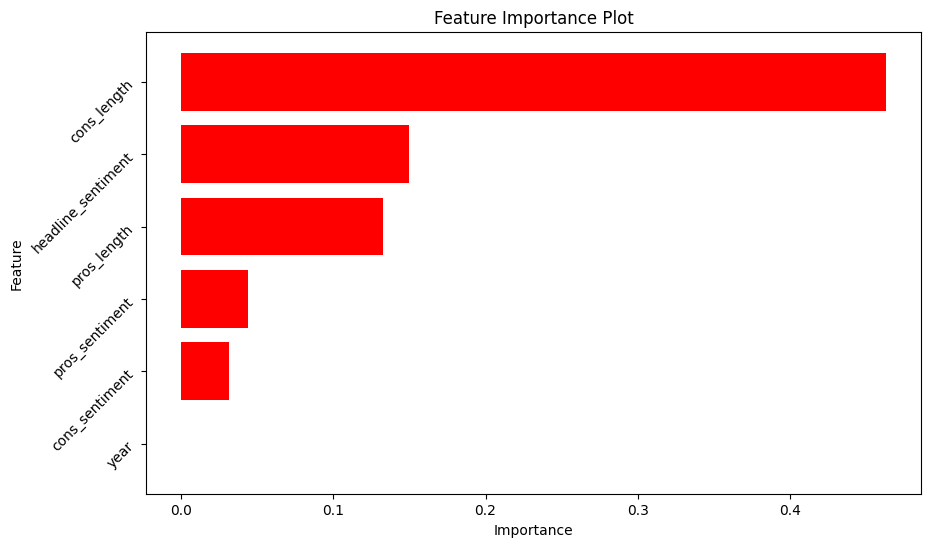

In [198]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), mean_importance[sorted_idx], align="center", color='red')
plt.yticks(range(X_test.shape[1]), feature_names[sorted_idx], rotation=45)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

In [166]:

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust these values based on your needs
    'max_depth': [None, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],  # Other hyperparameters you want to tune
    # Add more hyperparameters as needed
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'max_depth': 12, 'n_estimators': 100}
Test Accuracy: 0.4522647138595064


In [286]:
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

# Model Evaluation
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print MSE and R2 for the training set
print(f'MSE (Training Set): {mse_train_rf}')
print(f'R2 Score (Training Set): {r2_train_rf}')


# Print MSE and R2 for the training set
print(f'MSE (Test Set): {mse_test_rf}')
print(f'R2 Score (Test Set): {r2_test_rf}')


MSE (Training Set): 0.8058427982143866
R2 Score (Training Set): 0.42367291145486696
MSE (Test Set): 0.9511346171232258
R2 Score (Test Set): 0.3241145272913635


In [343]:
test_accuracy = best_rf_model.score(X_train, y_train)


In [344]:
print(test_accuracy)

0.5509295360795615


In [169]:
print(best_rf_model.feature_importances_)

[0.05879228 0.12785493 0.22118532 0.29843565 0.15182553 0.14190628]


In [306]:
best_rf_model.feature_names_in_

array(['year', 'pros_length', 'cons_length', 'headline_sentiment',
       'pros_sentiment', 'cons_sentiment'], dtype=object)

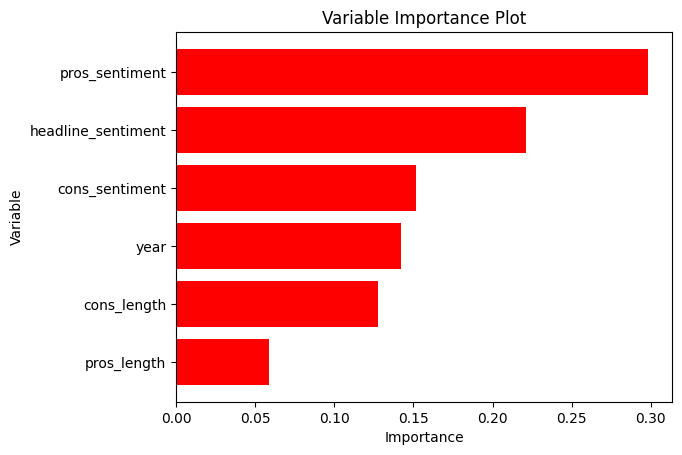

In [285]:
# Initalize the feature importance from the best tree
feature_imp = pd.DataFrame( {'importance':best_rf_model.feature_importances_}, index=features)
feature_imp.sort_values(by='importance', ascending=True)

# Sort the names and importances
sorted_names, sorted_imp = zip(*sorted(zip(features, feature_imp['importance']), key=lambda x: x[1]))

# Plot the bar graph
plt.barh(sorted_names, sorted_imp, label='Importance', color='red')
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.title("Variable Importance Plot")
plt.show()

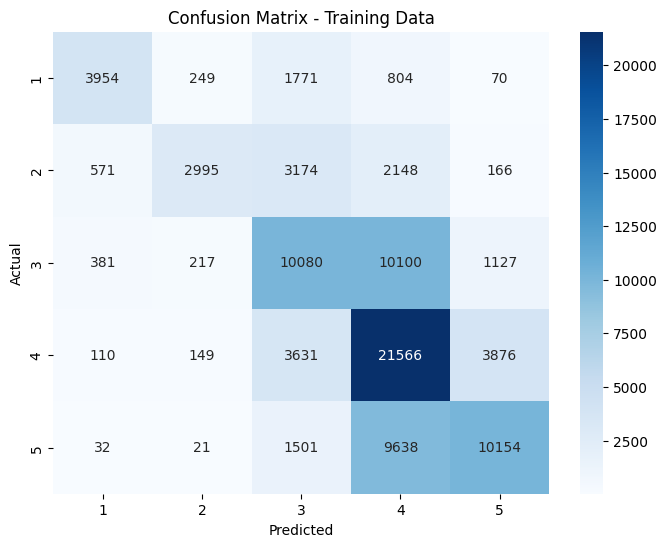

In [290]:

# Confusion Matrix for Training Data
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

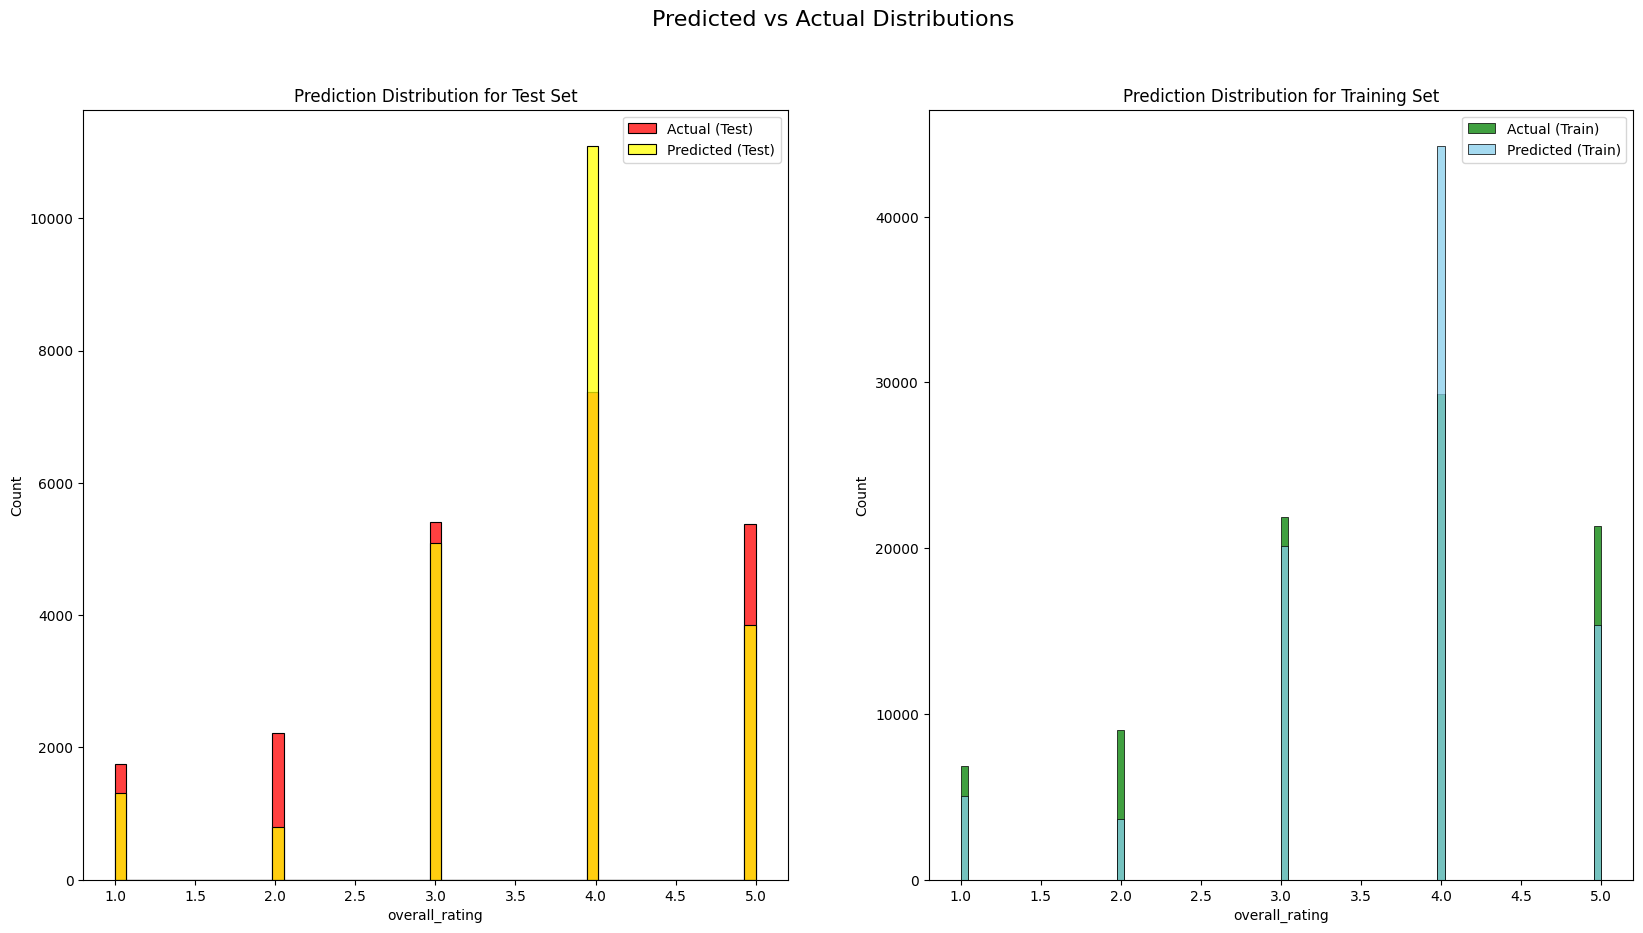

In [291]:
# Consolidated prediction distribution graph
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Predicted vs Actual Distributions', fontsize=16)
# Plot prediction distributions for actual and predicted values in training and test sets
sns.histplot(y_test, label='Actual (Test)', ax=axes[0], kde=False, color = "red")
sns.histplot(y_test_pred_rf, label='Predicted (Test)', ax=axes[0], kde=False, color="yellow")
axes[0].set_title(f'Prediction Distribution for Test Set')
axes[0].legend()

sns.histplot(y_train, label='Actual (Train)', ax=axes[1], kde=False, color = "green")
sns.histplot(y_train_pred_rf, label='Predicted (Train)', ax=axes[1], kde=False, color="skyblue")
axes[1].set_title(f'Prediction Distribution for Training Set')
axes[1].legend()
# sns.histplot(Y_test_pred, label='Predicted (Test)', ax=axes, kde=False, color="red")


# Save the figure
plt.savefig('consolidated_prediction_distributions.png')
plt.show()

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_12711/3903433233.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Actual', y='Predicted', data=df_compare, inner='quartile', palette='viridis')


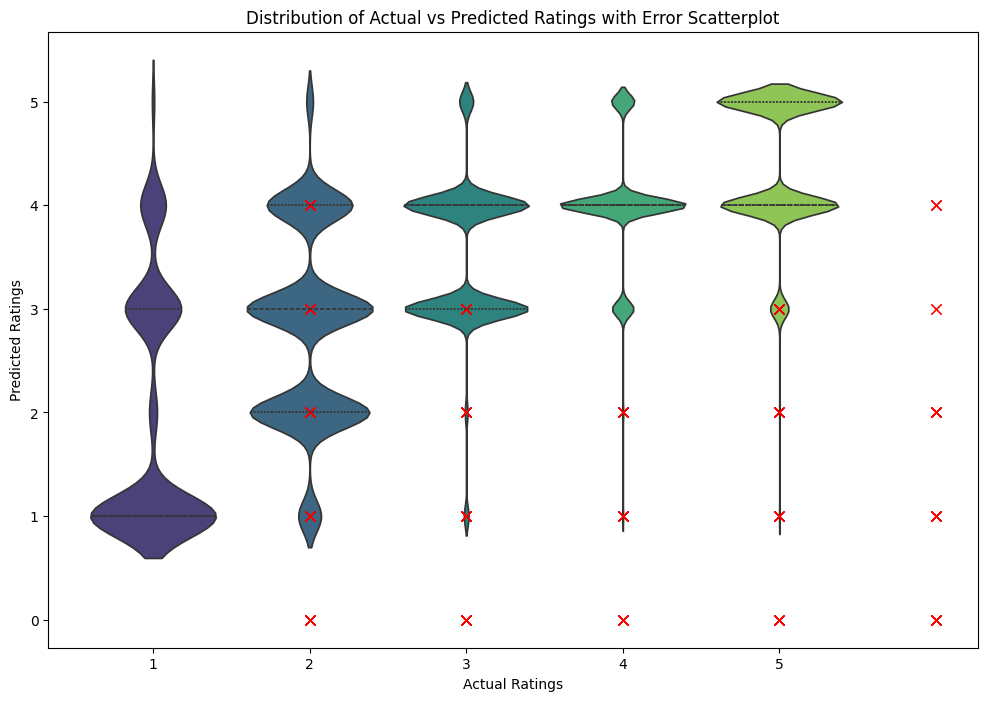

In [321]:
# Create a DataFrame
df_compare = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_rf, 'Errors': y_train_pred_rf-y_train})

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a violin plot
sns.violinplot(x='Actual', y='Predicted', data=df_compare, inner='quartile', palette='viridis')
plt.xticks = [1,2,3,4,5]
plt.yticks = [1,2,3,4,5]
# Add a scatterplot of errors
sns.scatterplot(x='Actual', y='Errors', data=df_compare, color='red', alpha=0.3, marker='x', s=50)

# Set labels and title
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Distribution of Actual vs Predicted Ratings with Error Scatterplot')

# Show the plot
plt.show()

/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_12711/1316249622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='overall_rating', y=feature, data=df, ax=axes[i], palette='coolwarm', scale='width')
/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_12711/1316249622.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='overall_rating', y=feature, data=df, ax=axes[i], palette='coolwarm', scale='width')
/var/folders/jn/v2jdn4p97ms6j6kbs3y53tsc0000gn/T/ipykernel_12711/1316249622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='overall_rating', y=feat

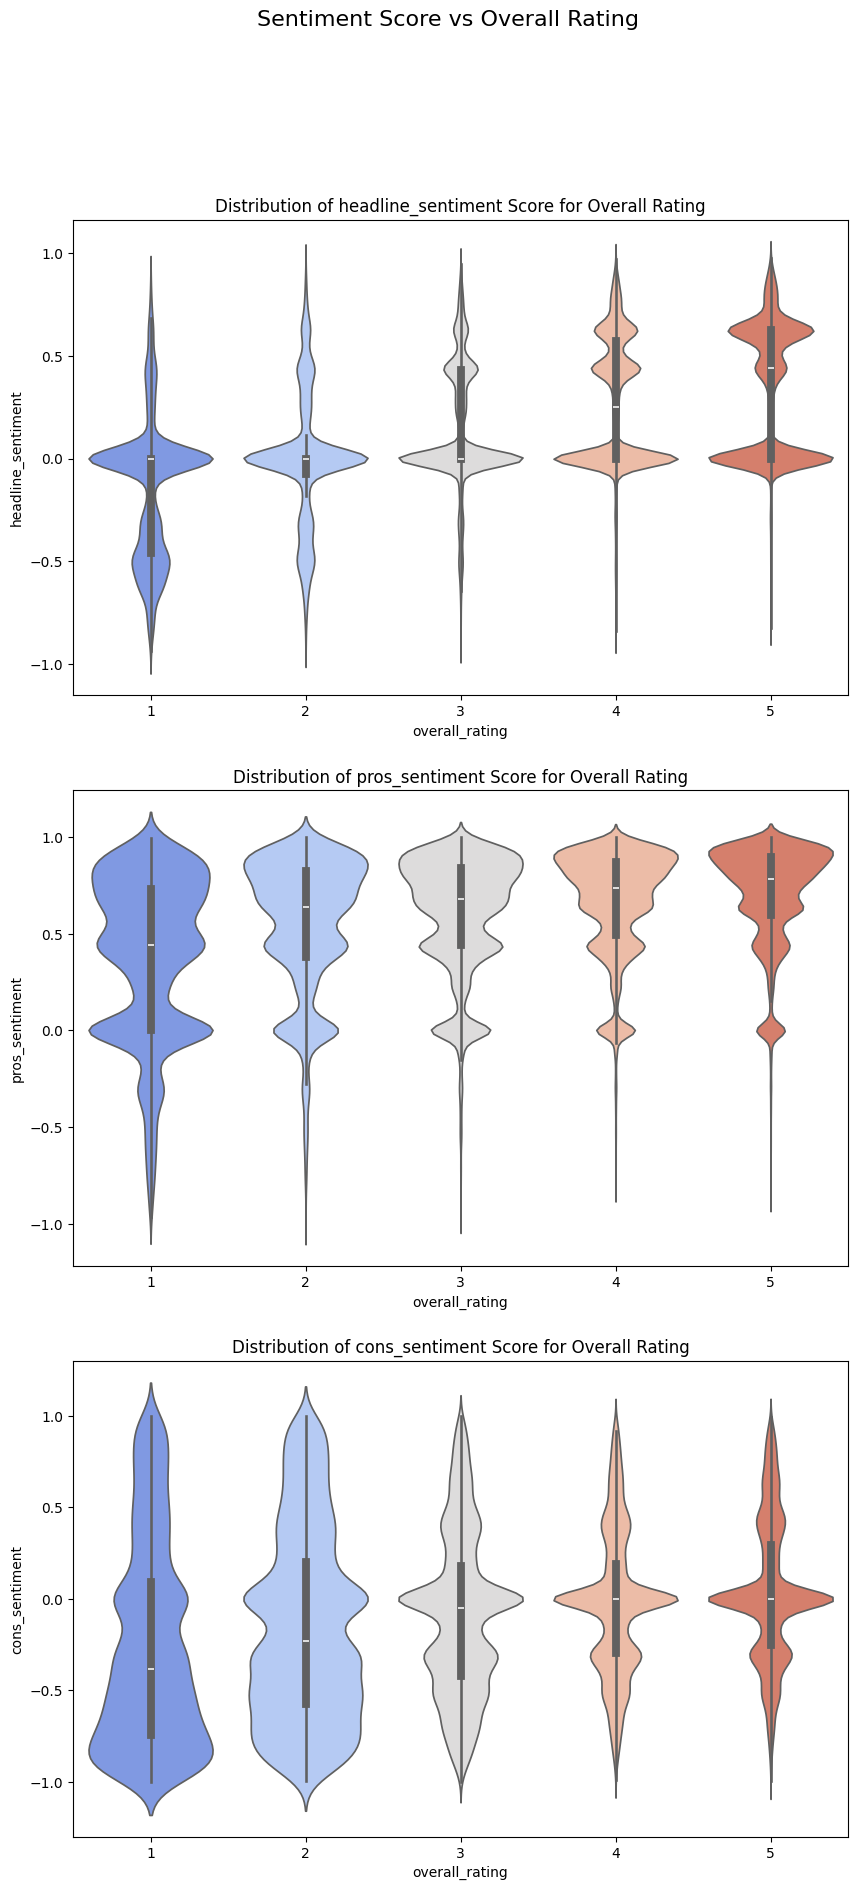

In [334]:
# Consolidated feature distribution graph
fig, axes = plt.subplots(nrows=3, figsize=(10, 21))
fig.suptitle('Sentiment Score vs Overall Rating', fontsize=16)
feature_cols = ['headline_sentiment', 'pros_sentiment', 'cons_sentiment']

# Plot feature distributions for training and test sets
for i, feature in enumerate(feature_cols):
    # Create a violin plot
    sns.violinplot(x='overall_rating', y=feature, data=df, ax=axes[i], palette='coolwarm', scale='width')
    axes[i].set_title(f'Distribution of {feature} Score for Overall Rating')

# Adjust the vertical gap between subplots
plt.subplots_adjust(hspace=0.2)
# Show the plot
plt.show()


In [150]:
import math

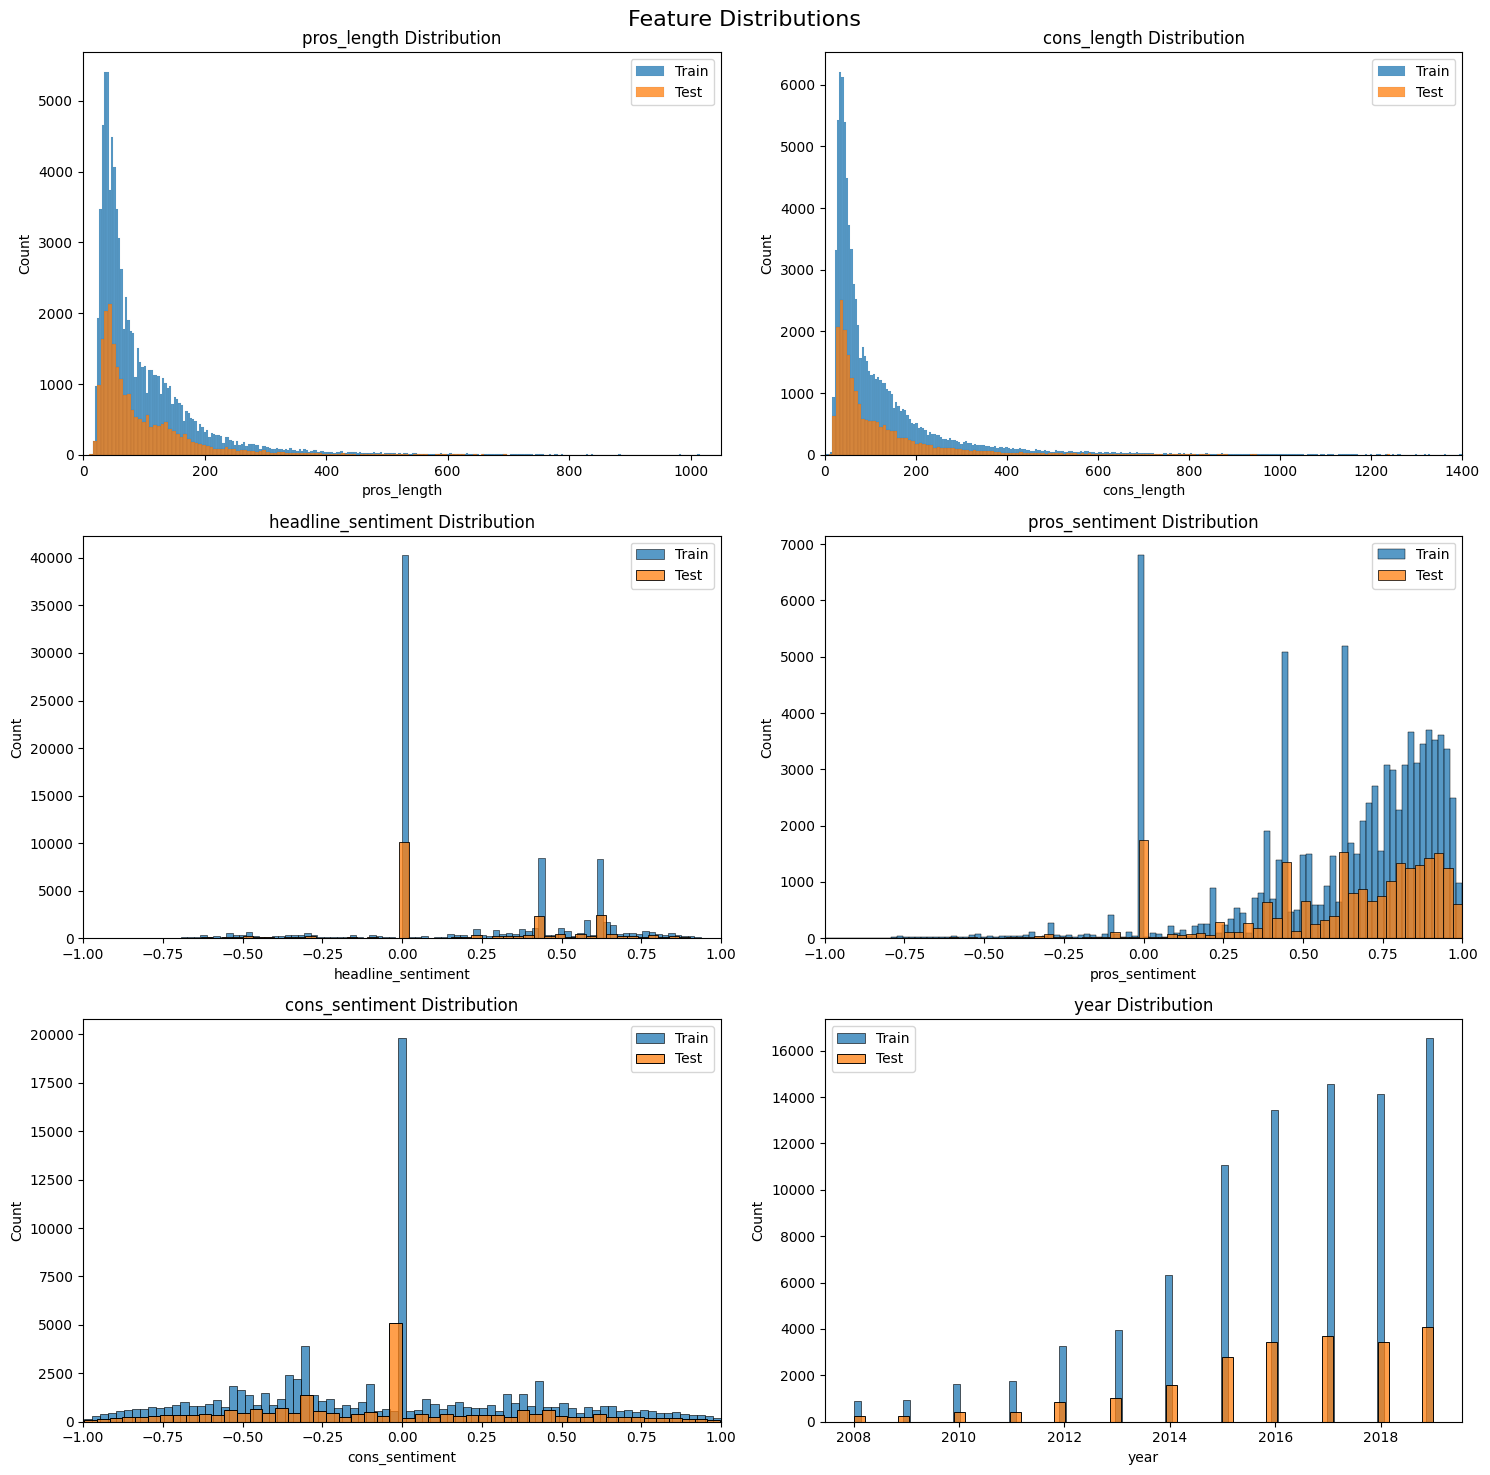

In [201]:
# Consolidated feature distribution graph
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Feature Distributions', fontsize=16)
feature_cols = ['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment','year']

# Plot feature distributions for training and test sets
for i, feature in enumerate(feature_cols):
    
    x = math.floor(i/2)
    y = i%(2)
    sns.histplot(X_train[feature], ax=axes[x, y],label='Train', kde=False)
    sns.histplot(X_test[feature], ax=axes[x, y],label='Test', kde=False)
    axes[x, y].set_title(f'{feature} Distribution')
    axes[x, y].legend()
axes[0, 0].set_xlim(0, 1050)
axes[0, 1].set_xlim(0, 1400) 
axes[1, 0].set_xlim(-1, 1)
axes[1, 1].set_xlim(-1, 1) 
axes[2,0].set_xlim(-1, 1) 
# Remove the empty subplot in the last row and second column
# fig.delaxes(axes[2, 1])

# Adjust layout to prevent clipping of titles
fig.tight_layout()

# Save the figure
plt.savefig('consolidated_feature_distributions.png')
plt.show()

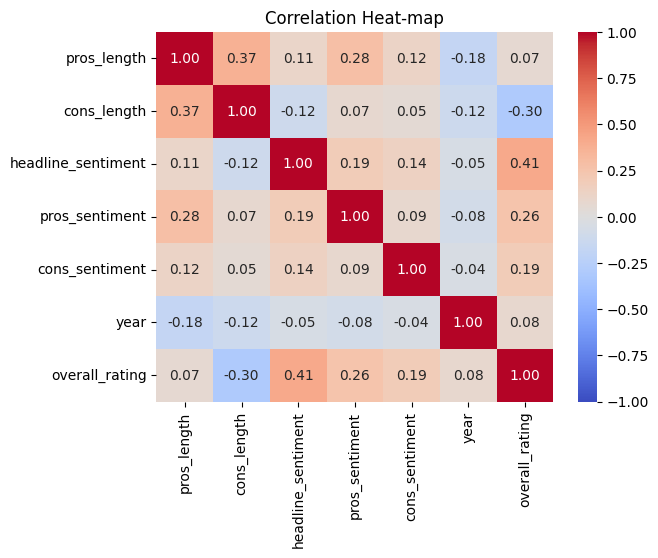

In [192]:
# Correlation heat-map
correlation_matrix = df[['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment','year', 'overall_rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heat-map')
plt.show()

In [268]:

# Confusion Matrix for Training Data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)



In [214]:
y_train_pred = np.round(np.clip(model.predict(X_train),1, 5))
y_test_pred = np.round(np.clip(model.predict(X_test),1, 5))

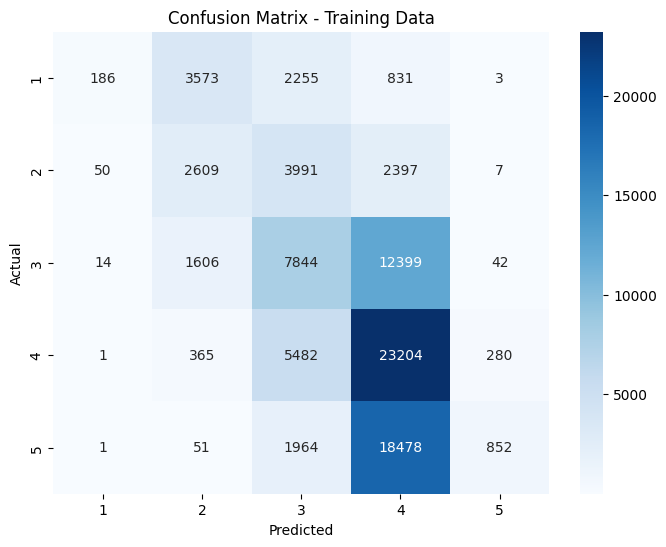

In [269]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

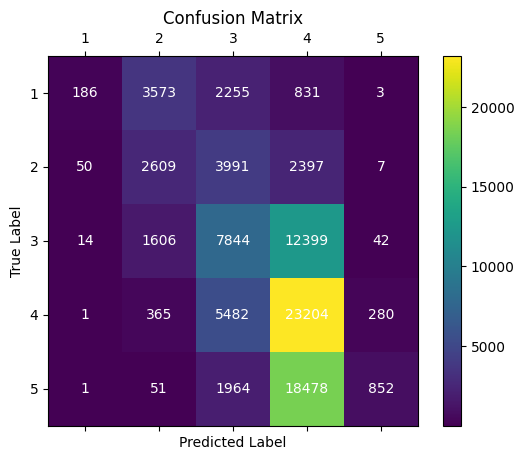

In [265]:
# Plot the confusion matrix as a table
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix_train, cmap='viridis')

# Add labels and customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(5), np.arange(1, 6))
plt.yticks(np.arange(5), np.arange(1, 6))

# Display the values in each cell
for i in range(conf_matrix_train.shape[0]):
    for j in range(conf_matrix_train.shape[1]):
        plt.text(j, i, str(conf_matrix_train[i, j]), ha='center', va='center', color='white')

# Add a colorbar
plt.colorbar(cax)

plt.show()


In [282]:
# Model Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print MSE and R2 for the training set
print(f'MSE (Training Set): {mse_train}')
print(f'R2 Score (Training Set): {r2_train}')


# Print MSE and R2 for the training set
print(f'MSE (Test Set): {mse_test}')
print(f'R2 Score (Test Set): {r2_test}')

MSE (Training Set): 0.9276261513250833
R2 Score (Training Set): 0.3365752225668177
MSE (Test Set): 0.9286230901365157
R2 Score (Test Set): 0.34011143644059116


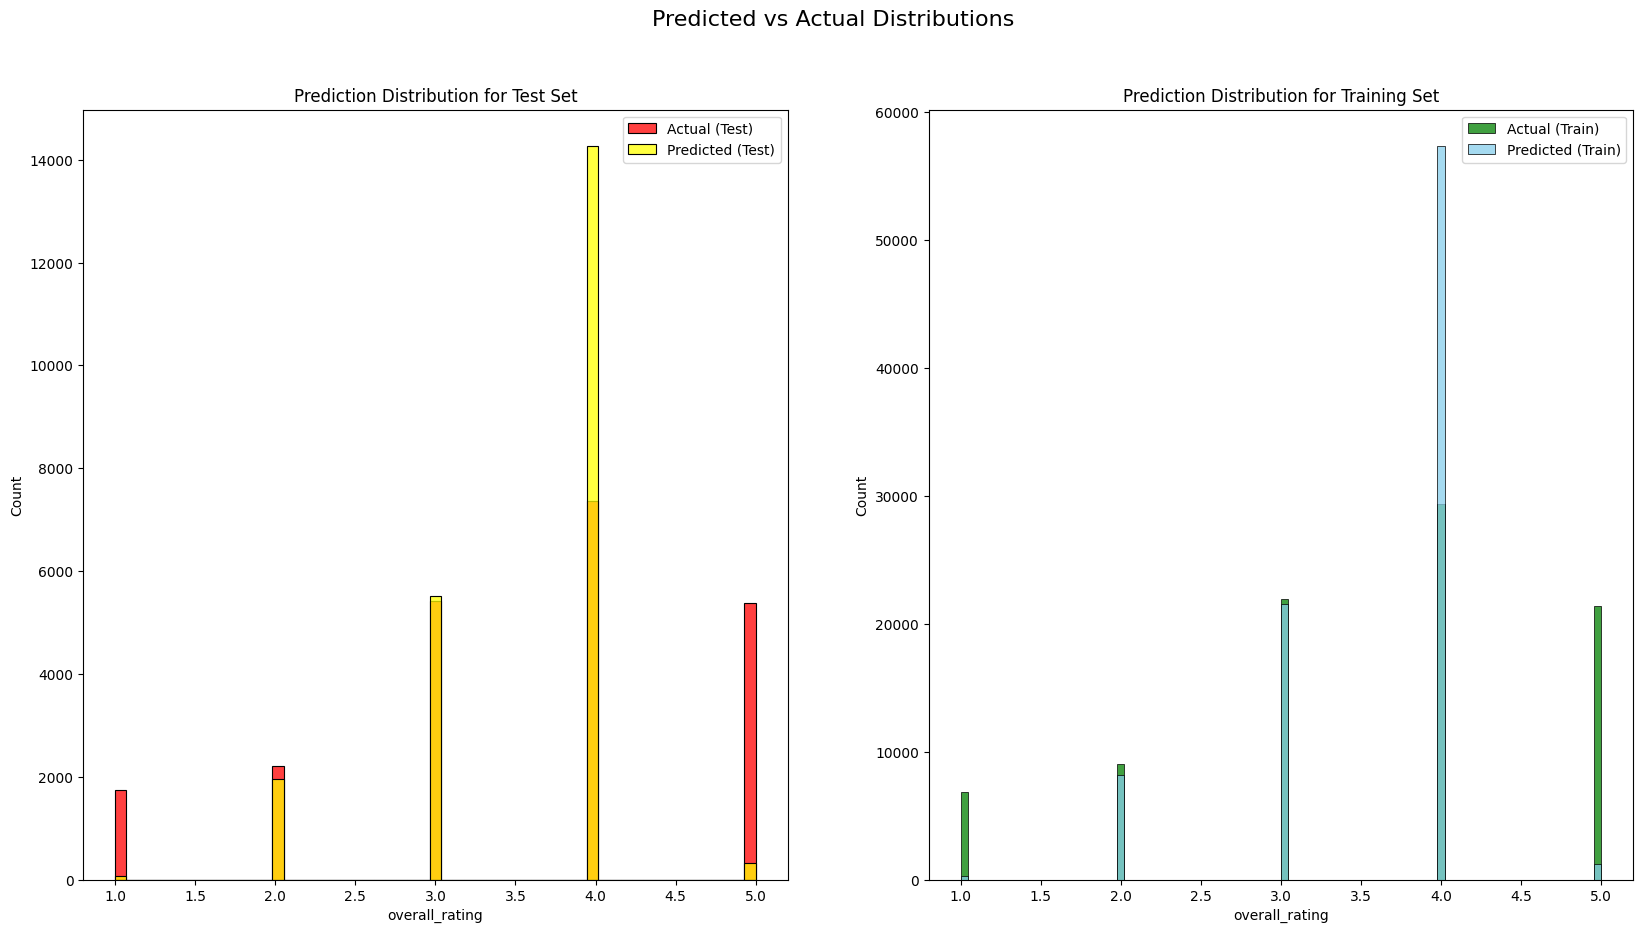

In [235]:
# Consolidated prediction distribution graph

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Predicted vs Actual Distributions', fontsize=16)
# Plot prediction distributions for actual and predicted values in training and test sets
sns.histplot(y_test, label='Actual (Test)', ax=axes[0], kde=False, color = "red")
sns.histplot(y_test_pred, label='Predicted (Test)', ax=axes[0], kde=False, color="yellow")
axes[0].set_title(f'Prediction Distribution for Test Set')
axes[0].legend()

sns.histplot(y_train, label='Actual (Train)', ax=axes[1], kde=False, color = "green")
sns.histplot(y_train_pred, label='Predicted (Train)', ax=axes[1], kde=False, color="skyblue")
axes[1].set_title(f'Prediction Distribution for Training Set')
axes[1].legend()
# sns.histplot(Y_test_pred, label='Predicted (Test)', ax=axes, kde=False, color="red")


# Save the figure
plt.savefig('consolidated_prediction_distributions.png')
plt.show()

In [277]:
# y_train_pred_custom = [5 if x > 4.2 else 1 if x < 1.7 else 2 if x < 2.8 else 3 if x < 3.65 else round(x) for x in np.clip(model.predict(X_train),1, 5)]
y_train_pred_custom = [5 if x > 4.2 else 1 if x < 1.7 else 2 if x < 2.5 else round(x) for x in np.clip(model.predict(X_train),1, 5)]

# Model Evaluation
mse_train = mean_squared_error(y_train, y_train_pred_custom)

r2_train = r2_score(y_train, y_train_pred_custom)


# Print MSE and R2 for the training set
print(f'MSE (Training Set): {mse_train}')
print(f'R2 Score (Training Set): {r2_train}')

MSE (Training Set): 0.9545798722947392
R2 Score (Training Set): 0.31729831202505854


In [273]:
y_test_pred_custom = [5 if x > 4.2 else 1 if x < 1.7 else 2 if x < 2.5 else round(x) for x in np.clip(model.predict(X_test),1, 5)]
r2_test = r2_score(y_test, y_test_pred_custom)
mse_test = mean_squared_error(y_test, y_test_pred_custom)
# Print MSE and R2 for the training set
print(f'MSE (Test Set): {mse_test}')
print(f'R2 Score (Test Set): {r2_test}')

MSE (Test Set): 0.9579151975409095
R2 Score (Test Set): 0.31929618116207803


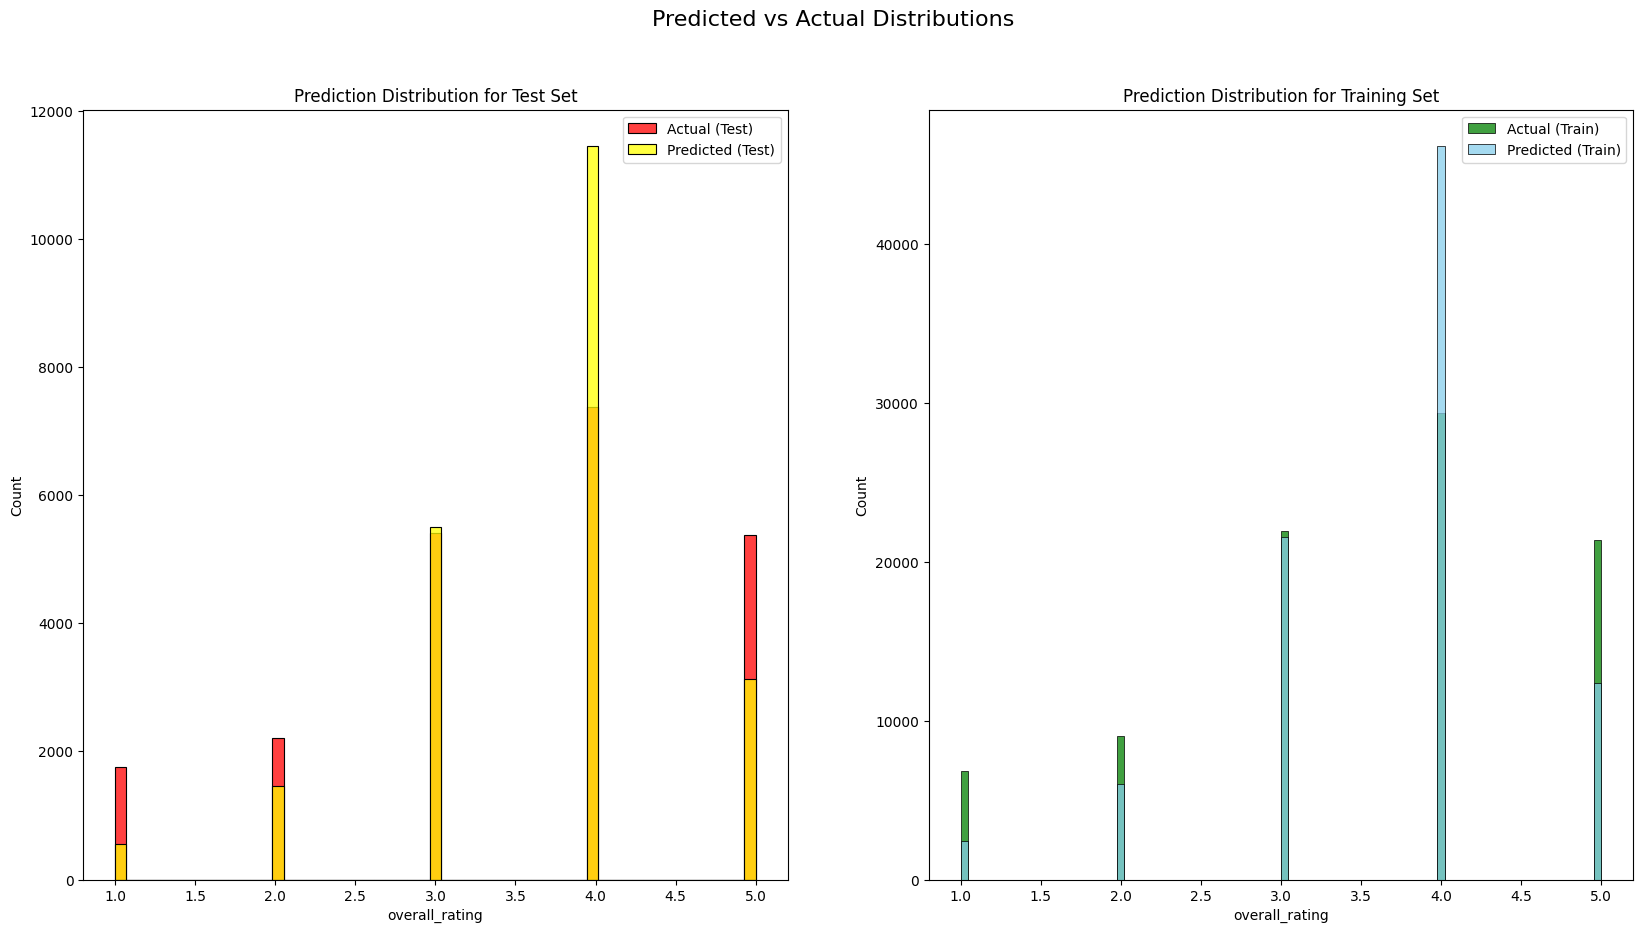

In [274]:
# Consolidated prediction distribution graph

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Predicted vs Actual Distributions', fontsize=16)
# Plot prediction distributions for actual and predicted values in training and test sets
sns.histplot(y_test, label='Actual (Test)', ax=axes[0], kde=False, color = "red")
sns.histplot(y_test_pred_custom, label='Predicted (Test)', ax=axes[0], kde=False, color="yellow")
axes[0].set_title(f'Prediction Distribution for Test Set')
axes[0].legend()

sns.histplot(y_train, label='Actual (Train)', ax=axes[1], kde=False, color = "green")
sns.histplot(y_train_pred_custom, label='Predicted (Train)', ax=axes[1], kde=False, color="skyblue")
axes[1].set_title(f'Prediction Distribution for Training Set')
axes[1].legend()
# sns.histplot(Y_test_pred, label='Predicted (Test)', ax=axes, kde=False, color="red")


# Save the figure
plt.savefig('consolidated_prediction_distributions.png')
plt.show()

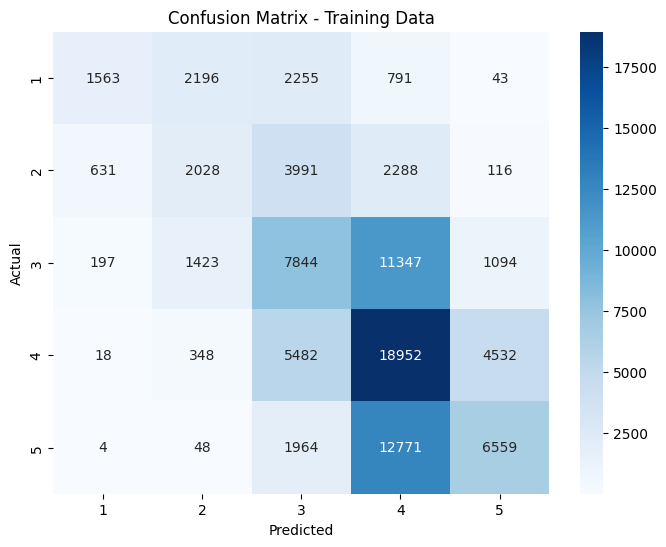

In [278]:
# Confusion Matrix for Training Data
conf_matrix_train_custom = confusion_matrix(y_train, y_train_pred_custom)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train_custom, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [281]:
np.unique(y_test_pred_custom)

array([1, 2, 3, 4, 5])

In [295]:
dataPred = pd.read_csv("./424_F2023_Final_PC_glassdoor_test_without_response_v1.csv")
print(dataPred.head())
print(dataPred.shape)


   overall_rating date_review                job_title         location  \
0             NaN  2021-01-15        Financial Advisor              NaN   
1             NaN  2021-06-01               Consultant  Los Angeles, CA   
2             NaN  2021-01-30                  Manager              NaN   
3             NaN  2021-03-18               Consultant              NaN   
4             NaN  2021-02-07   Data Center Technician     Waukesha, WI   

                headline                                               pros  \
0               Good job            Management at the company is wonderful.   
1    Great place to work          Incredible people and established culture   
2  Awesome place to work            Great technical accounting experience !   
3       Senior executive            Good work Life balance in normal season   
4       ok place to work  It was good for me as a starting job out of co...   

                                                cons  year  
0            

In [296]:
dataPred.drop(['overall_rating','small','job_title','location'], errors='ignore',
  axis='columns', inplace=True)
dataPred.shape

(56976, 5)

In [297]:
# Specify the columns you want to check for missing values
columns_to_check = ['pros', 'cons', 'headline','year']

# Check for missing values in the specified columns
dataPred[columns_to_check].isna().any()



pros        False
cons         True
headline     True
year        False
dtype: bool

In [300]:
dataPred.count()

date_review    56976
headline       56661
pros           56976
cons           56975
year           56976
dtype: int64

In [301]:
dataPred['cons'].fillna('', inplace=True)
dataPred['headline'].fillna('', inplace=True)

In [302]:
# Feature construction
dataPred['pros_length'] = dataPred['pros'].apply(len)
dataPred['cons_length'] = dataPred['cons'].apply(len)
dataPred['headline_sentiment'] = dataPred['headline'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])
dataPred['pros_sentiment'] = dataPred['pros'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])


In [303]:
dataPred['cons_sentiment'] = dataPred['cons'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(str(x))['compound'])


In [79]:
strcols = ["pros","cons","headline","job_title"]
for col in strcols:
    dataPred[col] = [str(x) for x in dataPred[col]]

In [304]:
# output to csv file
csv_file_out = "./postsentimentTestNew.csv"

# Save the DataFrame to a CSV file
dataPred.to_csv(csv_file_out,index=False, encoding="utf-8", float_format="%1.6f")

In [345]:
dataPred = dataPred[['year', 'pros_length', 'cons_length', 'headline_sentiment',
       'pros_sentiment', 'cons_sentiment']]
Y_test_pred = best_rf_model.predict(dataPred)

In [313]:
# output to csv file
csv_file_out = "./output.csv"

# Save the DataFrame to a CSV file
np.savetxt(csv_file_out, Y_test_pred, delimiter="\n",fmt="%i")

In [309]:
print(len(Y_test_pred))
print(len(dataPred))

56976
56976


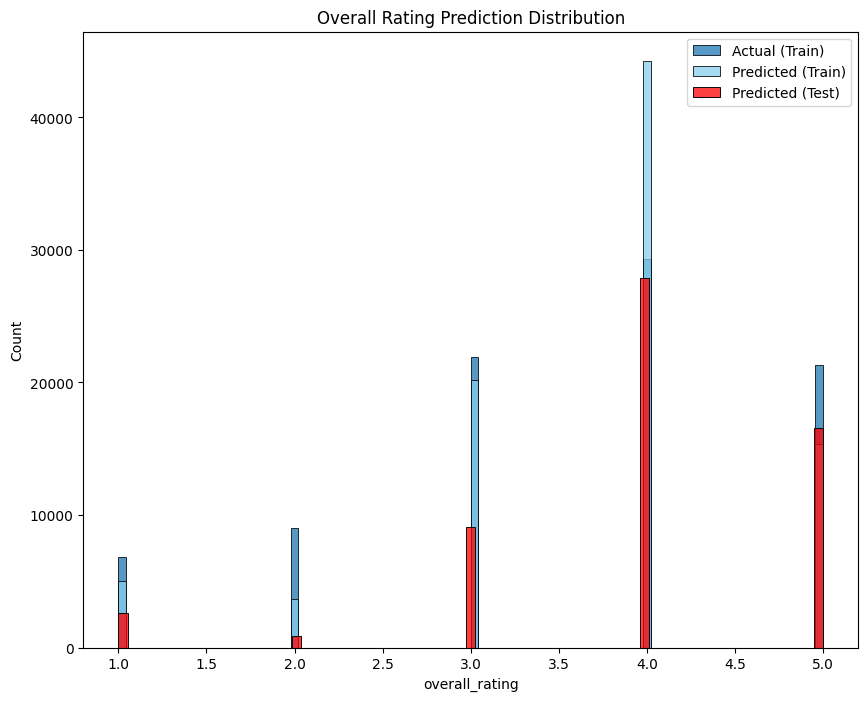

In [311]:
# Consolidated prediction distribution graph
fig, axes = plt.subplots(figsize=(10, 8))
# Plot prediction distributions for actual and predicted values in training and test sets
sns.histplot(y_train, label='Actual (Train)', ax=axes, kde=False)
sns.histplot(y_train_pred_rf, label='Predicted (Train)', ax=axes, kde=False, color="skyblue")
sns.histplot(Y_test_pred, label='Predicted (Test)', ax=axes, kde=False, color="red")

axes.set_title('Overall Rating Prediction Distribution')
axes.legend()

# Save the figure
plt.savefig('consolidated_prediction_distributions.png')
plt.show()

In [240]:
import math

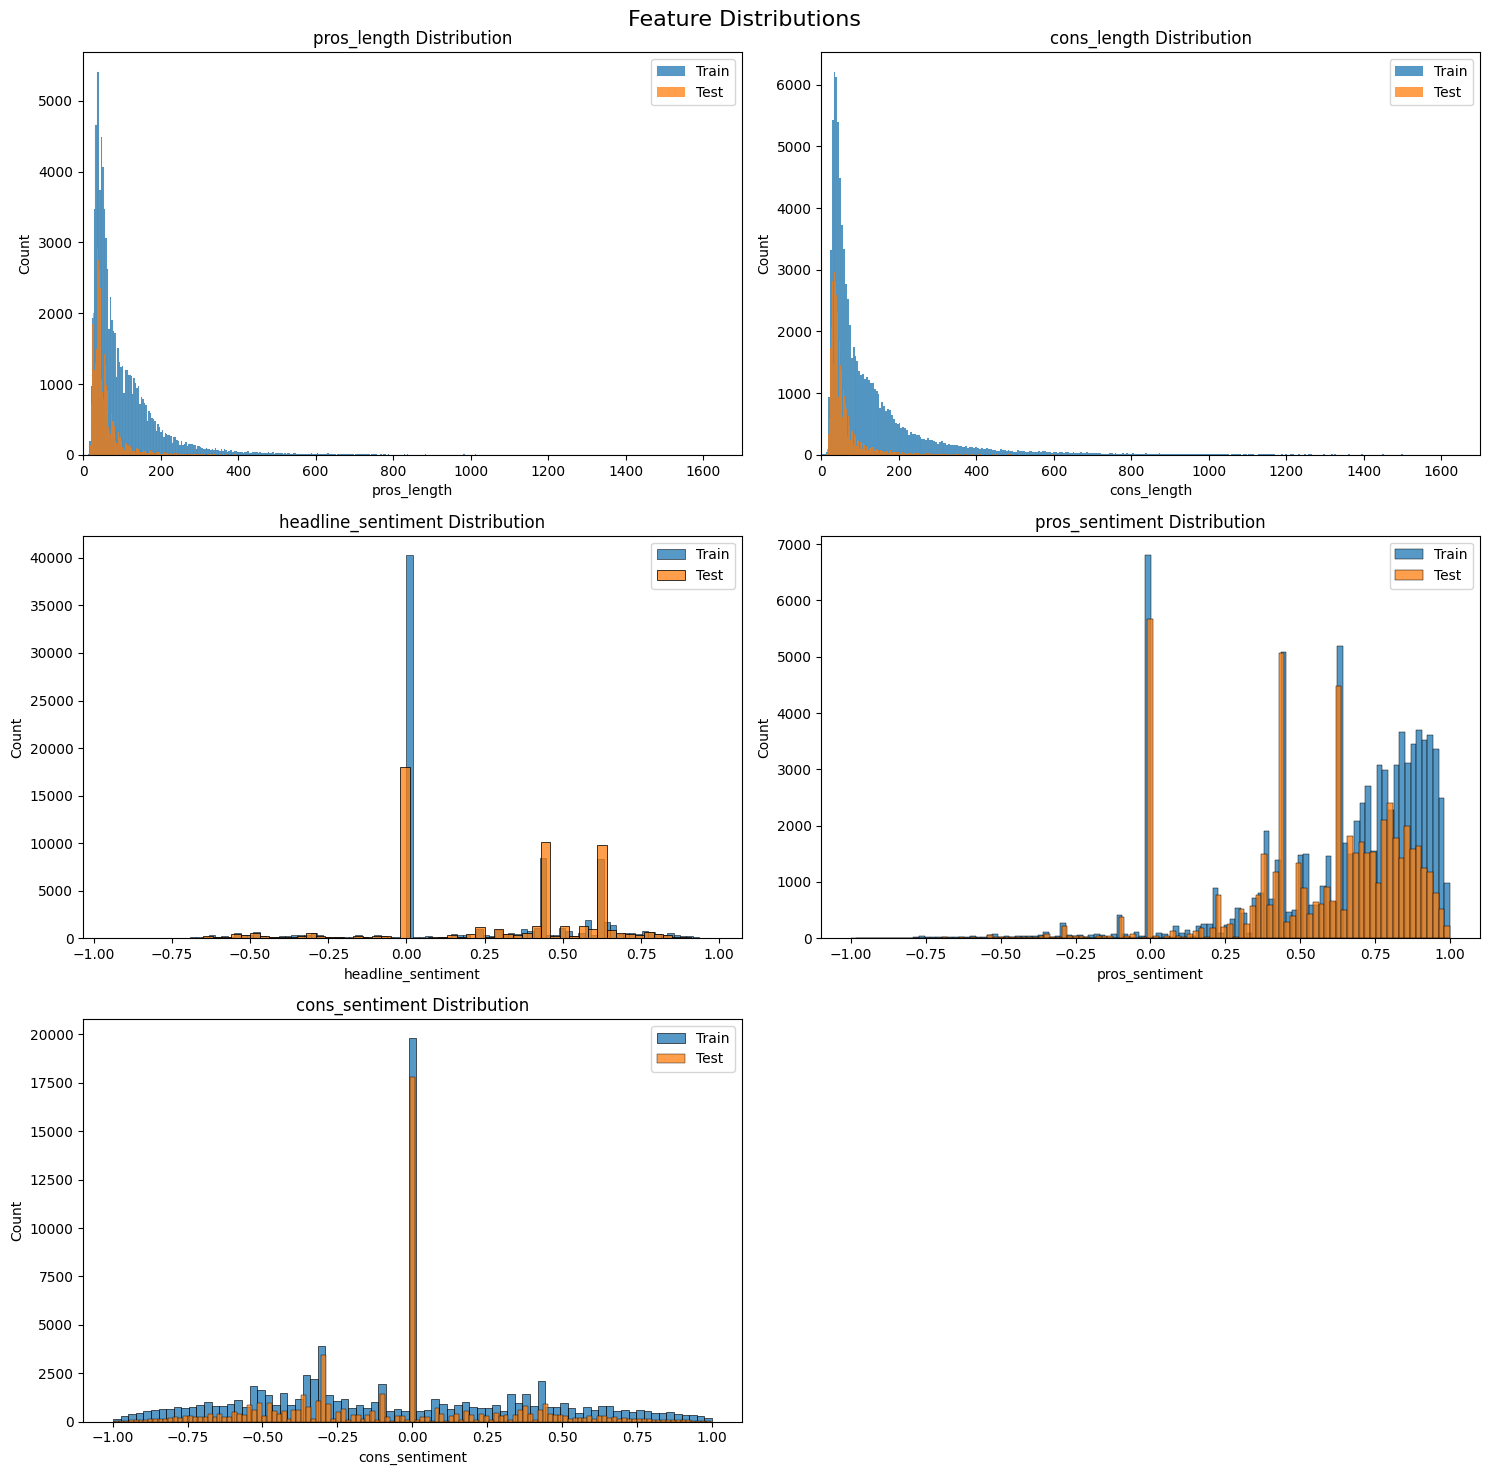

In [315]:
# Consolidated feature distribution graph
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Feature Distributions', fontsize=16)

# Plot feature distributions for training and test sets
for i, feature in enumerate(features):
    
    x = math.floor(i/2)
    y = i%(2)
    sns.histplot(X_train[feature], ax=axes[x, y],label='Train', kde=False)
    sns.histplot(dataPred[feature], ax=axes[x, y],label='Test', kde=False)
    axes[x, y].set_title(f'{feature} Distribution')
    axes[x, y].legend()
axes[0, 0].set_xlim(0, 1700)
axes[0, 1].set_xlim(0, 1700)  
# Remove the empty subplot in the last row and second column
fig.delaxes(axes[2, 1])

# Adjust layout to prevent clipping of titles
fig.tight_layout()

# Save the figure
plt.savefig('consolidated_feature_distributions.png')
plt.show()

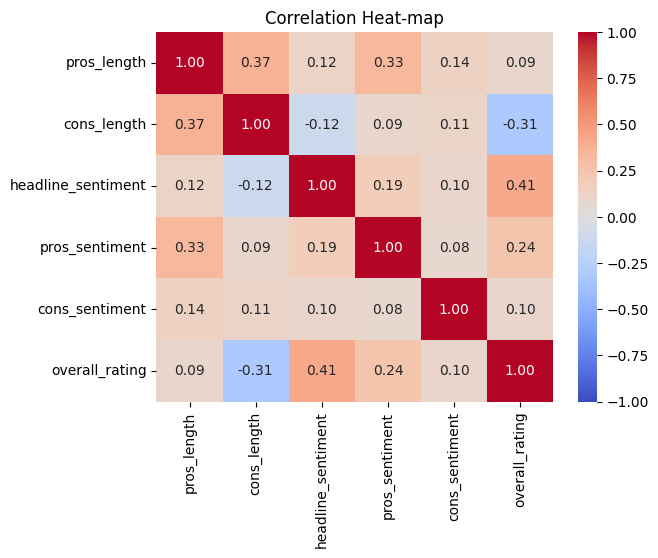

In [236]:
# Correlation heat-map
correlation_matrix = df[['pros_length', 'cons_length', 'headline_sentiment', 'pros_sentiment', 'cons_sentiment', 'overall_rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heat-map')
plt.show()